In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf

import pandas as pd

In [2]:
import pandas as pd

# Transcribed data
data = {
    'X': [0.94, 1.31, 1.06, 1.16, 1.32, 1.40, 1.00, 1.44, 1.34, 1.21, 1.19, 1.40, 1.17, 1.23, 1.23, 1.37, 1.48, 1.31, 1.19, 1.33, 1.26, 1.22, 1.39, 1.28, 1.25, 1.32, 1.27, 1.04, 1.19, 1.20],
    'Y': [1.06, 1.16, 1.07, 1.09, 1.11, 1.11, 1.08, 1.13, 1.16, 1.11, 1.08, 1.15, 1.14, 1.11, 1.07, 1.12, 1.14, 1.13, 1.10, 1.14, 1.13, 1.04, 1.11, 1.10, 1.11, 1.12, 1.12, 0.90, 1.10, 1.14],
    'Z': [22.47, 28.33, 25.78, 25.18, 25.85, 21.81, 24.92, 29.47, 26.42, 25.49, 23.40, 25.89, 26.35, 26.41, 24.17, 25.05, 30.56, 20.52, 30.49, 26.60, 27.99, 20.96, 24.11, 24.71, 26.35, 21.70, 26.67, 21.44, 25.46, 27.37]
}

# Create DataFrame
data = pd.DataFrame(data)

# Display the DataFrame
data.head()


,X,Y,Z
0,0.94,1.06,22.47
1,1.31,1.16,28.33
2,1.06,1.07,25.78
3,1.16,1.09,25.18
4,1.32,1.11,25.85


Assuming that no additional information was collected together with the signal data, propose 
a method to reduce the dimensionality of the problem in such a way to capture at least 85% 
of the overall variability. How many principal components (PCs) are needed? Discuss the 
results (include the plots of the loadings and, if possible, their interpretation). 

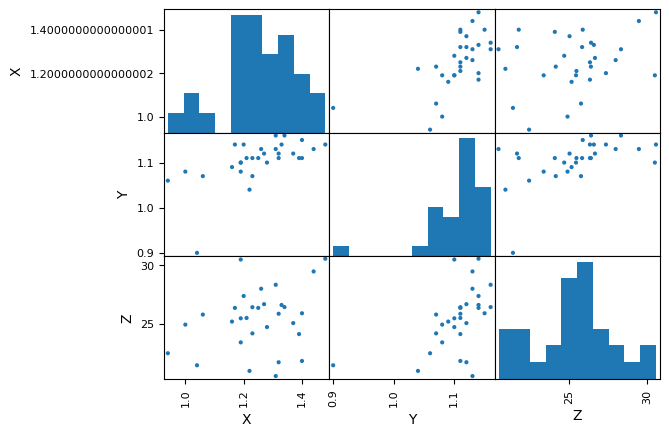

In [3]:
mf.scatter_b_vars(data)

Number of points n = 30
Mean = 1.25


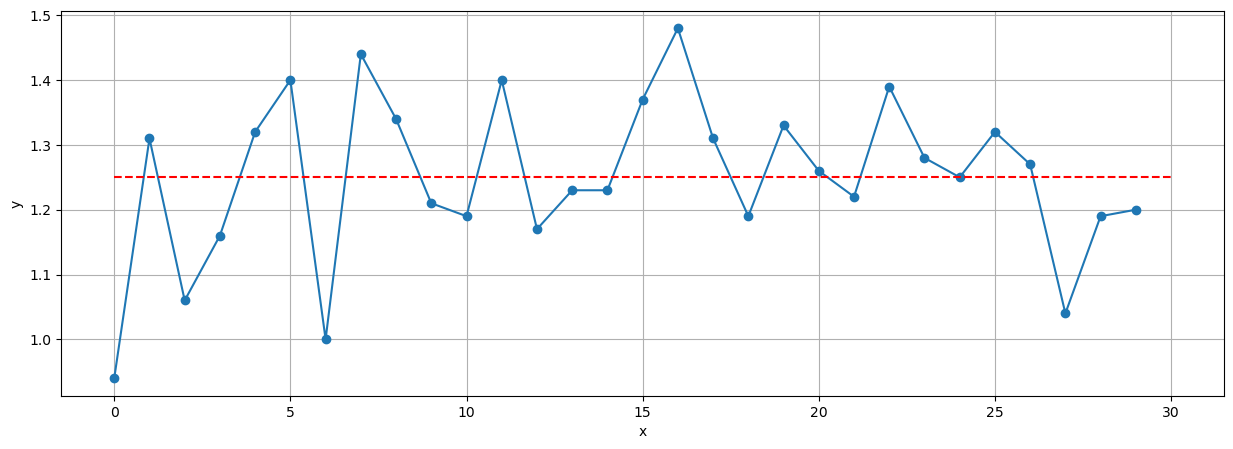

Number of points n = 30
Mean = 1.10


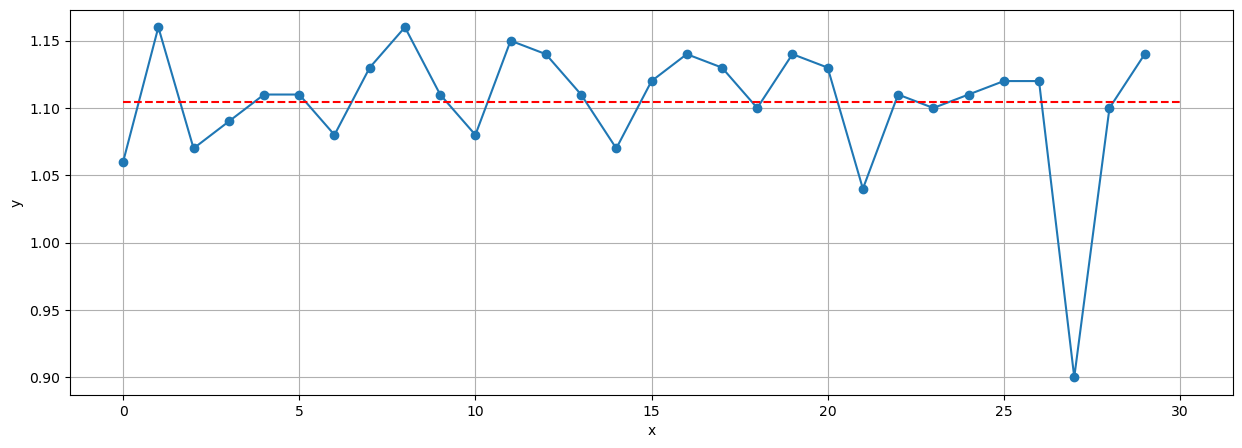

Number of points n = 30
Mean = 25.40


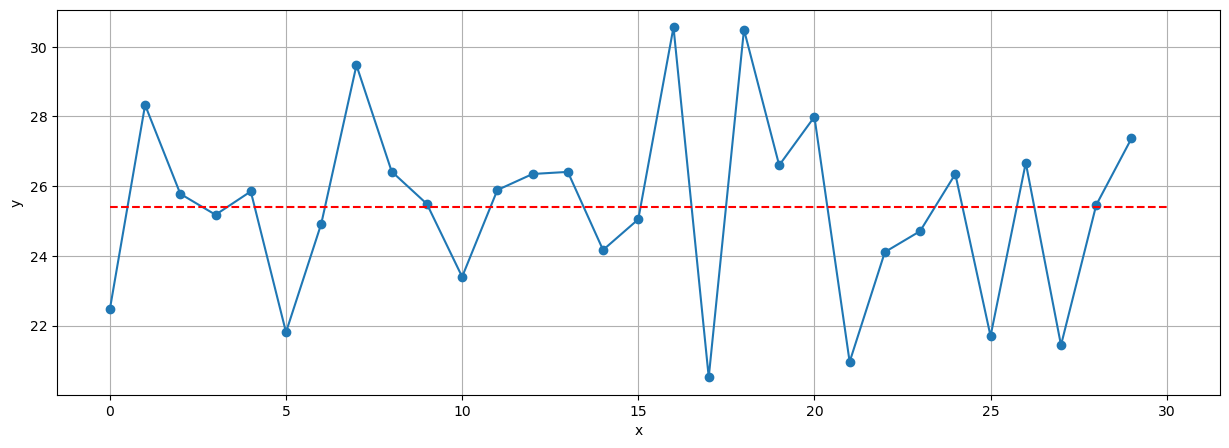

In [5]:
mf.single_ts_plot(data['X'])
mf.single_ts_plot(data['Y'])
mf.single_ts_plot(data['Z'])

p-value of the Shapiro-Wilk test: 0.00001


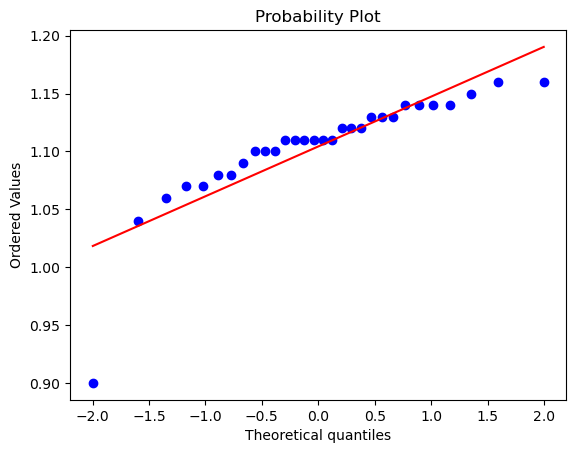

Reject H0: the data are not normal


In [21]:
mf.shapiroqq(data['Y'])

p-value of the Shapiro-Wilk test: 0.48883


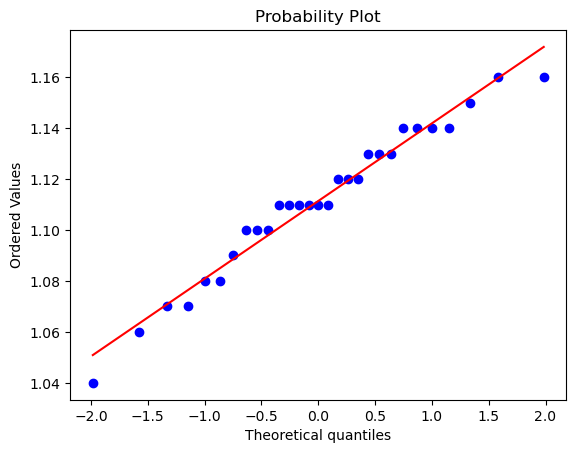

Accept H0: the data are normal
Number of points n = 30
Mean = 1.11


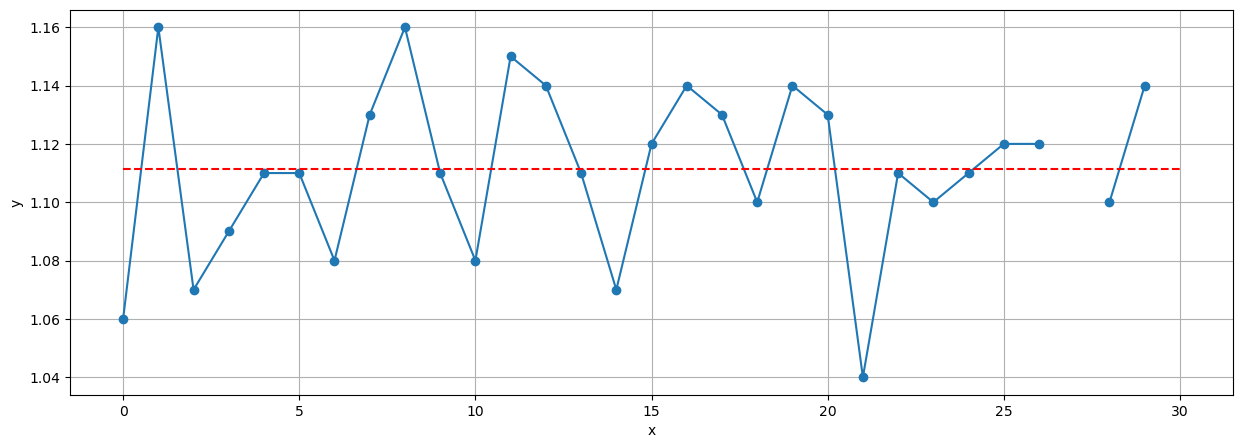

In [24]:
data2=data.copy()
data2.iloc[27,:]=np.nan
mf.shapiroqq(data2['Y'])
mf.single_ts_plot(data2['Y'])

In [4]:
cov_matrix = data.cov()
print(cov_matrix)
corr_matrix = data.corr()
print(corr_matrix)


          X         Y         Z
X  0.016234  0.003734  0.093945
Y  0.003734  0.002343  0.064136
Z  0.093945  0.064136  6.835048
          X         Y         Z
X  1.000000  0.605561  0.282022
Y  0.605561  1.000000  0.506849
Z  0.282022  0.506849  1.000000


In [8]:
[pca,scores_df]=mf.p_pca(data, sample_to_use=len(data), standardize='yes')

Eigenvalues 
 [1.94178496 0.7238319  0.33438314]

Eigenvectors aka Loadings 
 [[-0.56730222 -0.64220389 -0.51550204]
 [-0.61709355 -0.08299853  0.78250035]
 [ 0.54531068 -0.76202717  0.34921463]]

Explained variance ratio 
 [0.64726165 0.2412773  0.11146105]

Cumulative explained variance ratio 
 [0.64726165 0.88853895 1.        ]
first 5 rows of the df scores:
         z1        z2        z3
0  2.545689  0.701248 -1.019770
1 -1.584013  0.491712 -0.227904
2  1.226054  1.093616 -0.221503
3  0.633751  0.395417 -0.188548
4 -0.476113 -0.213255  0.270835


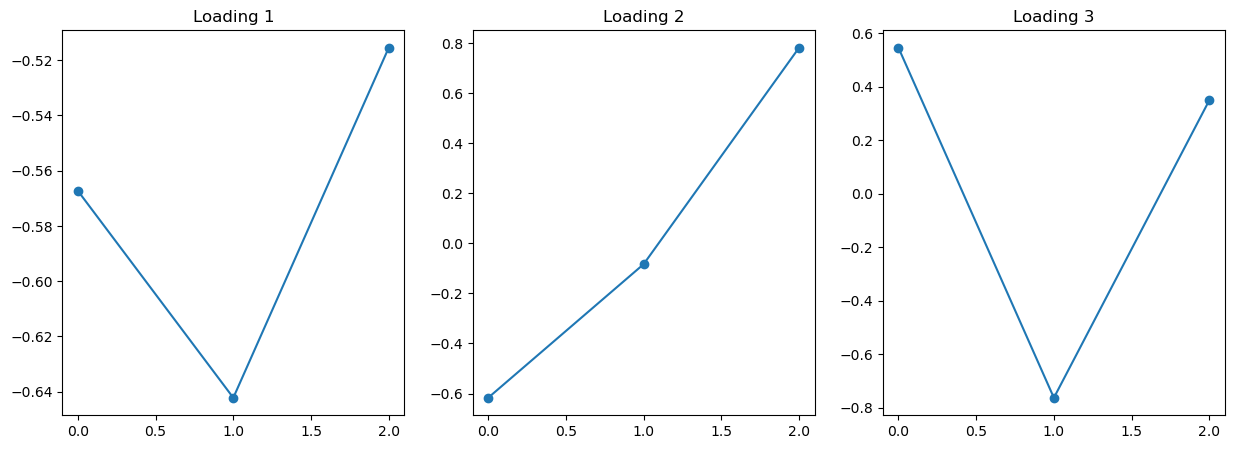

In [9]:
mf.plotloadings(pca)

Design a T2 chart based on long-term variance-covariance estimator and discuss the result 
(show the chart  - qualitatively - and report the value of the control limit). 

p-value of the Shapiro-Wilk test: 0.08192


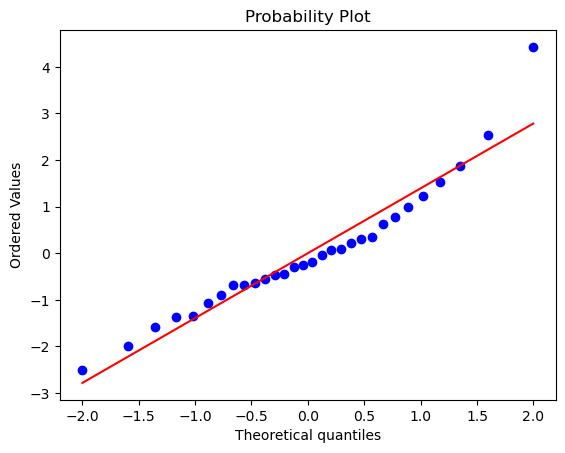

Accept H0: the data are normal
p-value of the Shapiro-Wilk test: 0.27247


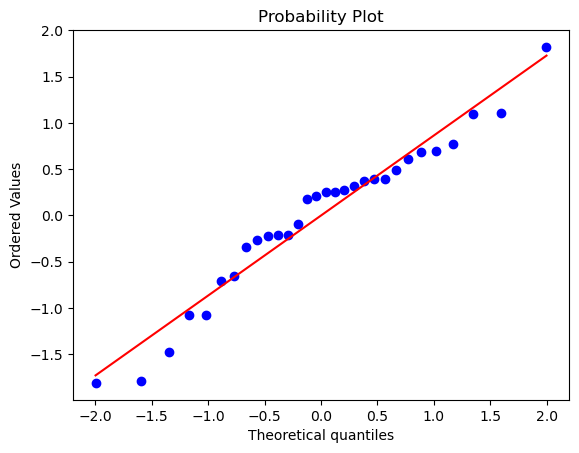

Accept H0: the data are normal
Runs test statistic = 1.615
Runs test p-value = 0.10625
Accept H0: the data are random
Runs test statistic = 0.480
Runs test p-value = 0.63156
Accept H0: the data are random


In [17]:
#check delle assumptions
data_to_use=scores_df.iloc[:,0:2]

mf.shapiroqq(data_to_use['z1'])
mf.shapiroqq(data_to_use['z2'])

mf.runs(data_to_use['z1'])
mf.runs(data_to_use['z2'])

In [19]:

Xbar = data_to_use.mean() #sample mean vector
S1 = data_to_use.cov() #il long range estimator è la semplice cov matrix 😊
print("The long range estimator is: \n", S1)



The long range estimator is: 
               z1            z2
z1  1.941785e+00 -4.895013e-17
z2 -4.895013e-17  7.238319e-01


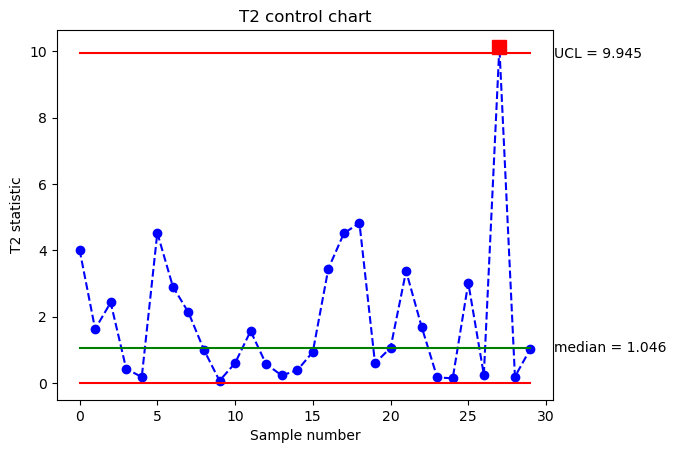

In [20]:
[UCL,data_CC]=mf.T2cc_n_1(2,len(data_to_use),0.0027,data_to_use,Xbar,S1)